# KUNTALA SRUJAN BALU

# DATA SCIENCE AND BUSINESS ANALYTICS PROJECT 

  Importing all the required libraries

In [4]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Changing Directory

In [5]:
import os
os.getcwd()

'C:\\Users\\samen\\AppData\\Local\\Programs\\Python\\Python39\\Scripts'

In [6]:
os.chdir("C:\\Users\samen\OneDrive\Desktop\Machine learning Project")

Reading Data

In [7]:
# reading data from 'student_scores_data.csv' file
data=pd.read_csv('Student_scores_data.csv')

In [8]:
data.shape

(25, 2)

In [9]:
print('Columns in the table are Hours and Scores :-')
data.columns

Columns in the table are Hours and Scores :-


Index(['Hours', 'Scores'], dtype='object')

In [10]:
print('Printing data of all 25 rows')
data.head(25)

Printing data of all 25 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
# Identifying categorical and continuous variables
data.dtypes
# As expected we got both variables as continuous

Hours     float64
Scores      int64
dtype: object

In [12]:
# Making 2 separate 1D arrays for both columns
time=pd.DataFrame(data,columns=['Hours'])
marks=pd.DataFrame(data,columns=['Scores'])

In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

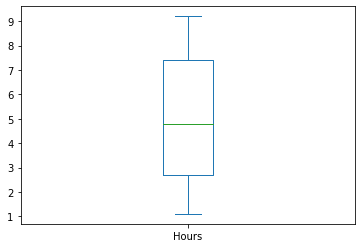

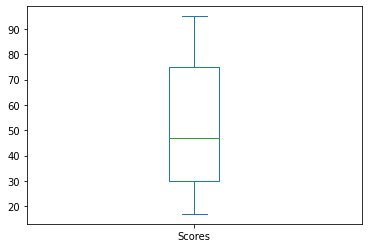

In [14]:
time.plot.box()
marks.plot.box()
# We can see there are no outliers

 Univariate Analysis

In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Histogram Plots of Hours and Scores Respectively 



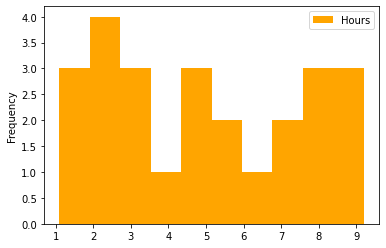

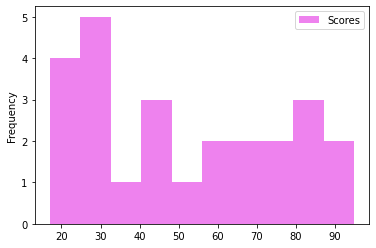

In [16]:
a=time.plot.hist(color='orange')#plt.hist(data['Hours'])
b=marks.plot.hist(color='violet')
print('Histogram Plots of Hours and Scores Respectively','\n')

In [17]:
#Frequency of each value in Hours
data['Hours'].value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [18]:
#Frequency of each value in Scores
data['Scores'].value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

Bivariate Analysis

In [19]:
# i.e. the relation between the variables HOURS AND SCORES

Text(0.5, 1.0, 'Scatter Plot of Hours vs Scores')

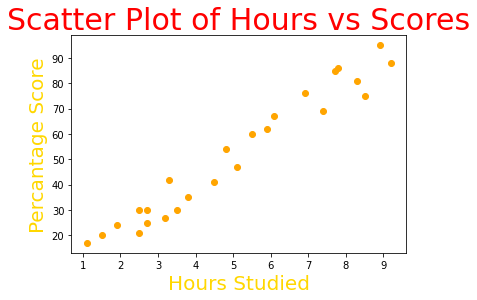

In [20]:
plt.scatter(time,marks,marker='o',color='orange')
plt.xlabel('Hours Studied',color='Gold',size=20)
plt.ylabel('Percantage Score',color='Gold',size=20)
plt.title('Scatter Plot of Hours vs Scores',color='red',size=30)

In [21]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Segregating Variables into input and output

In [22]:
x_var=data.iloc[:,:-1].values
y_var=data.iloc[:,1].values
x_var,y_var

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [23]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

 Splitting Our data into training and testing parts (using train_test_split)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_var,y_var,test_size=0.2,random_state=56)


In [26]:
from sklearn.linear_model import LinearRegression as LR
lr=LR()
lr.fit(x_train, y_train)

LinearRegression()

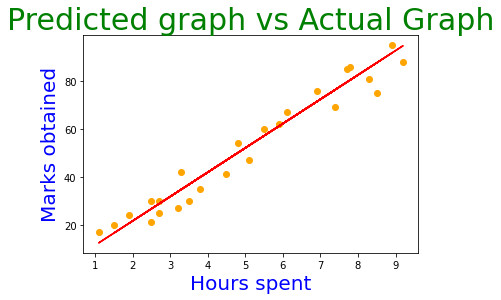

In [27]:
line =lr.coef_*x_var+lr.intercept_
plt.scatter(data['Hours'],data['Scores'],color='orange')
plt.plot(x_var,line,color='red')
plt.title('Predicted graph vs Actual Graph',size=30,color='Green')
plt.xlabel('Hours spent',color='Blue',size=20)
plt.ylabel('Marks obtained',color='Blue',size=20)
plt.show()

# Making Prediction

In [28]:
y_pred=lr.predict(x_test)

# Testing data

In [29]:
#input
x_test

array([[2.5],
       [7.4],
       [3.8],
       [8.5],
       [6.1]])

# Question

# What will be Predicted score if a student studies 9.25hrs/day?

In [30]:
hours=[[9.25]]
pred_ans=lr.predict(hours)
# pred_ans[0]
print(f"According to linear regression model you can score {pred_ans[0]}")

According to linear regression model you can score 95.30451579533701


# Evaluating the Model via Mean Absolute Error Metric

In [28]:
from sklearn import metrics
error=metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error = {error}")

Mean Absolute Error = 6.424351078220743
